# 🎯 Customer Churn Prediction – Machine Learning Project

## 📌 Problem Statement

Customer churn prediction is a critical task in the business and telecom industry.  
This project aims to build a machine learning model that can predict whether a customer is likely to leave the company (churn) based on their demographic, service, and billing information.

By identifying customers who are at risk of leaving, companies can take proactive steps to improve customer satisfaction and retention.

---

### 🧠 Problem Type: Classification  
### 🎯 Target Variable: **Churn (Yes / No)**  
### ⚙️ Approach: Supervised Machine Learning

---

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/Telco_Customer_Churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Exploratory Data Analysis (EDA)

### Churn Distribution

In [4]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Churn Ratio Visualization

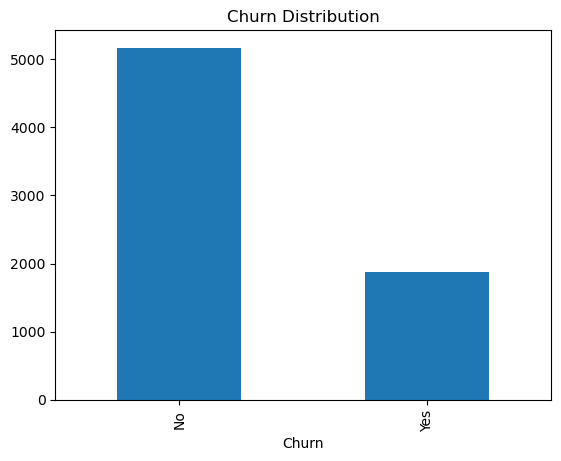

In [5]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()

### Tenure vs Churn

In [6]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

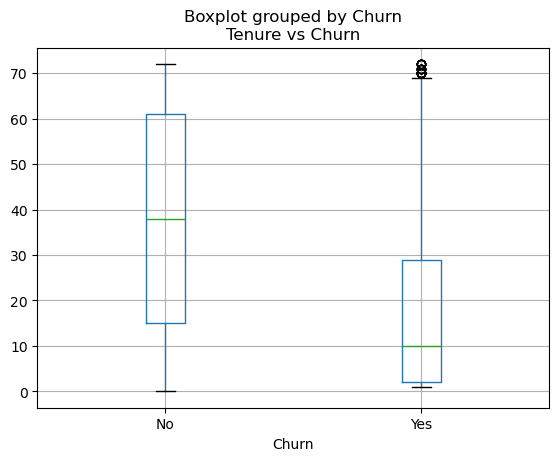

In [7]:
df.boxplot(column="tenure", by="Churn")
plt.title("Tenure vs Churn")
plt.show()

### MonthlyCharges vs Churn

In [8]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

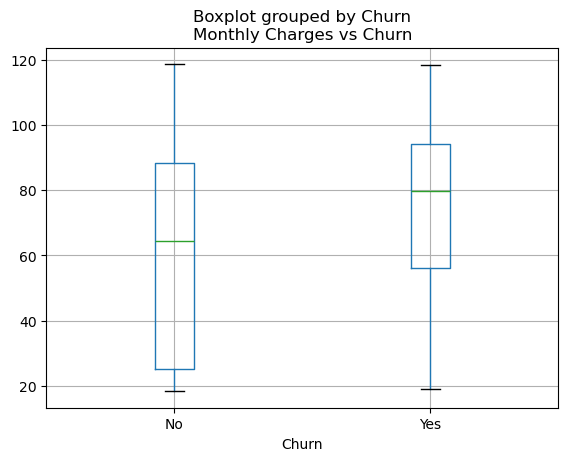

In [9]:
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges vs Churn")
plt.show()

### Contract Type vs Churn

In [10]:
pd.crosstab(df["Contract"], df["Churn"])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


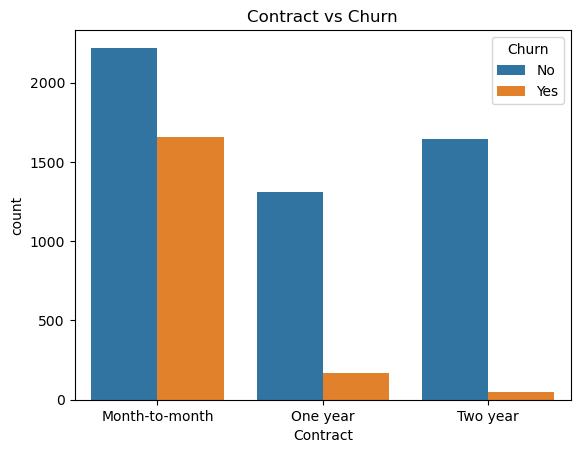

In [11]:
import seaborn as sns

sns.countplot(x="Contract", hue="Churn", data=pd.read_csv("data/Telco_Customer_Churn.csv"))
plt.title("Contract vs Churn")
plt.show()

### Internet Service vs Churn

In [12]:
pd.crosstab(df["InternetService"], df["Churn"])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


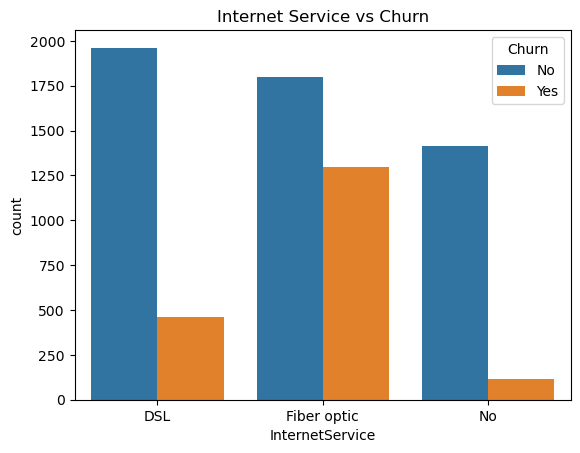

In [13]:
import seaborn as sns

sns.countplot(x="InternetService", hue="Churn", data=pd.read_csv("data/Telco_Customer_Churn.csv"))
plt.title("Internet Service vs Churn")
plt.show()

## Data Cleaning & Preprocessing

In [14]:
# customerID drop
df.drop('customerID', axis=1, inplace=True)

In [15]:
# numeric convert 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check  missing value (NaN) 
print(df['TotalCharges'].isnull().sum())

11


In [16]:
# Missing value fill 
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [17]:
# Churn (Target)  1 or 0 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# categorical columns One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [19]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0.001275,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.472222,0.385075,0.215867,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0.027778,0.354229,0.010310,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.625000,0.239303,0.210241,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,0.027778,0.521891,0.015330,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## Train-Test Split And SMOTE

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Feature (X) and Target (y) 
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTE apply
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check imbalance fix 
print("Before SMOTE (y_train):", y_train.value_counts())
print("After SMOTE (y_train_res):", y_train_res.value_counts())

C:\Users\User\.conda\envs\churn_ml\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Before SMOTE (y_train): Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE (y_train_res): Churn
0    4139
1    4139
Name: count, dtype: int64


## Model Training

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Model initialization 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 2. Model Training and Evaluation
for name, model in models.items():
    # SMOTE data train 
    model.fit(X_train_res, y_train_res)
    
    # Prediction (Test set-e)
    y_pred = model.predict(X_test)
    
    # Result print
    print(f"================ {name} ================")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

================ Logistic Regression ================
Accuracy Score: 0.7395

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409



================ Random Forest ================
Accuracy Score: 0.7608

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1035
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409



================ Gradient Boosting ================
Accuracy Score: 0.7445

Classification Report:
              precision    recall  f1-score   s

C:\Users\User\.conda\envs\churn_ml\lib\site-packages\xgboost\training.py:199: UserWarning: [19:43:53] WARNING: D:\bld\xgboost-split_1768313915774\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# 1. XGBoost parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# 2. Randomized Search setup
xgb_tuned = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=xgb_params,
    n_iter=10, 
    cv=3, 
    scoring='f1', # balanced result f1 use
    random_state=42,
    n_jobs=-1
)

# 3. Train
xgb_tuned.fit(X_train_res, y_train_res)

# 4. Results
best_xgb = xgb_tuned.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("--- Optimized XGBoost Results ---")
print(f"Best Parameters: {xgb_tuned.best_params_}")
print(classification_report(y_test, y_pred_xgb))

C:\Users\User\.conda\envs\churn_ml\lib\site-packages\xgboost\training.py:199: UserWarning: [19:44:08] WARNING: D:\bld\xgboost-split_1768313915774\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Optimized XGBoost Results ---
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1035
           1       0.52      0.66      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



## Feature Importance

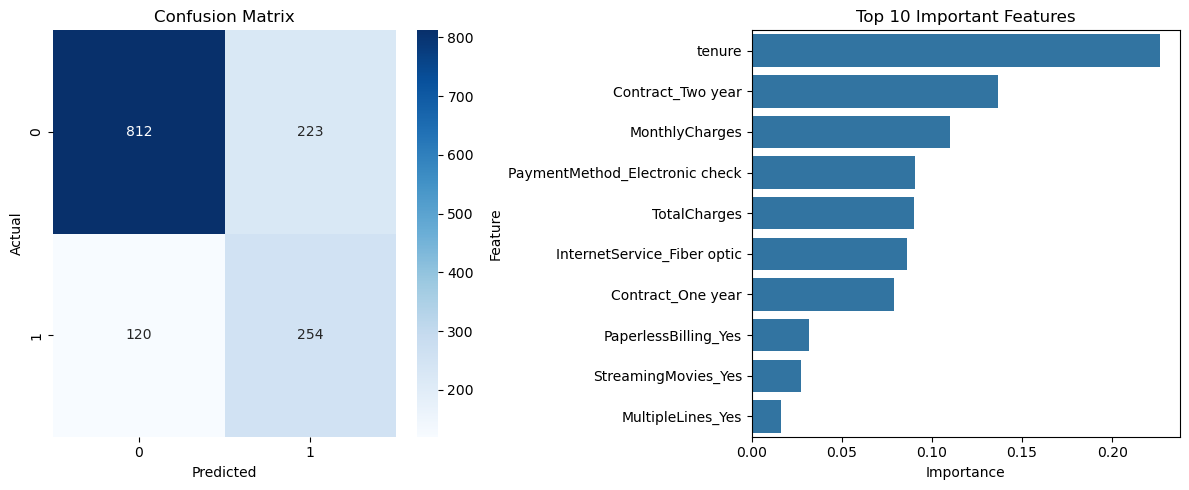

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Confusion Matrix Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_tuned) # y_pred_tuned optimized model prediction
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. Feature Importance Plot
plt.subplot(1, 2, 2)
importances = best_gb.feature_importances_ # best_gb optimized model
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10)) # Top 10 Features
plt.title('Top 10 Important Features')

plt.tight_layout()
plt.show()

## ROC-AUC Curve

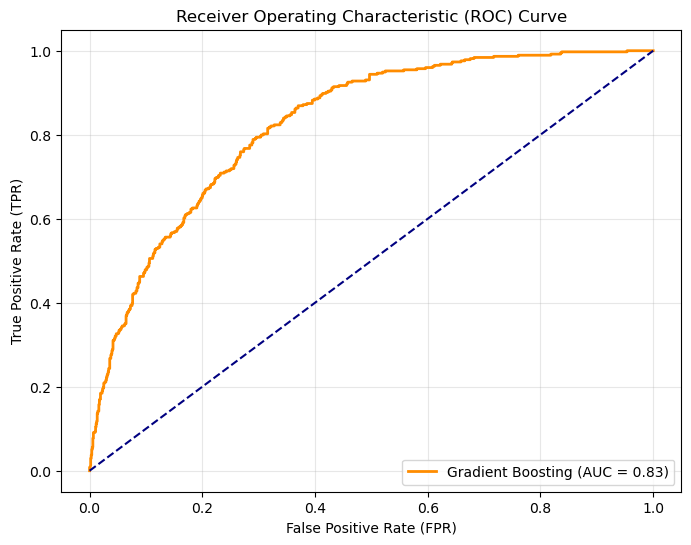

Model-er AUC Score holo: 0.8256


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Prediction Probabilities (Positive class)
# Gradient Boosting (best_gb) use
y_pred_prob = best_gb.predict_proba(X_test)[:, 1]

# 2. ROC curve calculation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# 3. Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc_score:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"Model-er AUC Score holo: {auc_score:.4f}")

## Model Save

In [ ]:
import pickle

# 1. Final Model Save (best_gb model-ta)
with open('churn_model.pkl', 'wb') as f:
    pickle.dump(best_gb, f)

# 2. Scaler Save (Deployment-e input data scale korar jonno lagbe)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 3. Features-er nam-er list save (optional kintu helpful)
with open('features.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

print("Shob file successfully save hoise! Ekhon amra deployment-e jete pari.")